<a href="https://colab.research.google.com/github/khangnkv/UniversityProjects/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


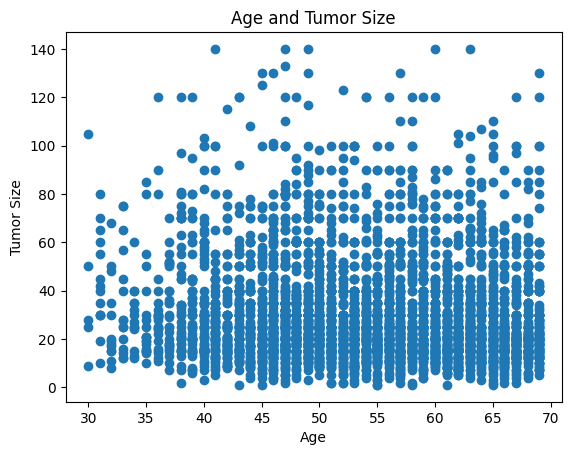

In [ ]:
age = data["Age"]
size = data["Tumor Size"]
plt.scatter(age, size)
plt.title("Age and Tumor Size")
plt.xlabel("Age")
plt.ylabel("Tumor Size")
plt.show()
#check if age and tumor size are related or not

<Axes: xlabel='Race', ylabel='count'>

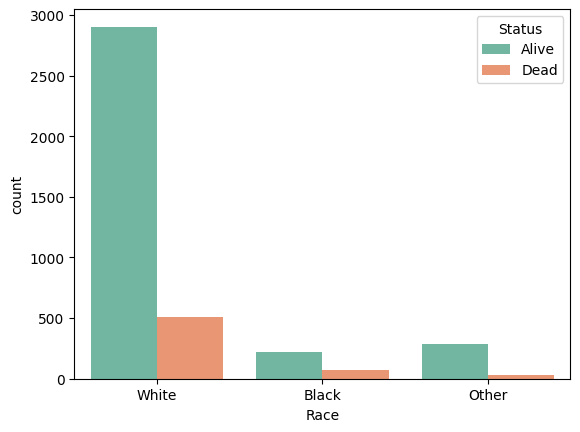

In [ ]:
sns.countplot(data = data, x="Race", hue="Status", palette="Set2")
#check if there's correlation between race and fatality

<Axes: xlabel='Race', ylabel='count'>

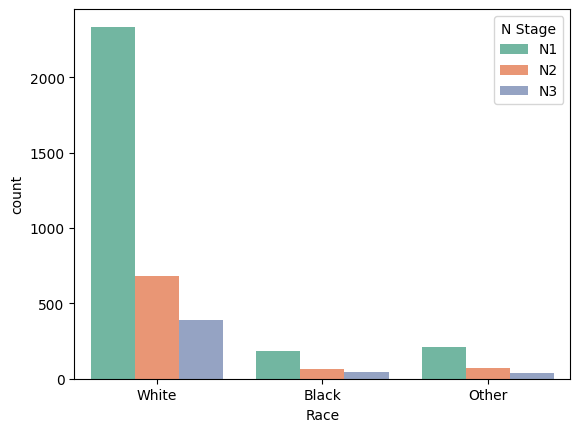

In [ ]:
sns.countplot(data = data, x="Race", hue="N Stage", palette="Set2")
#check the stages of cancer and race

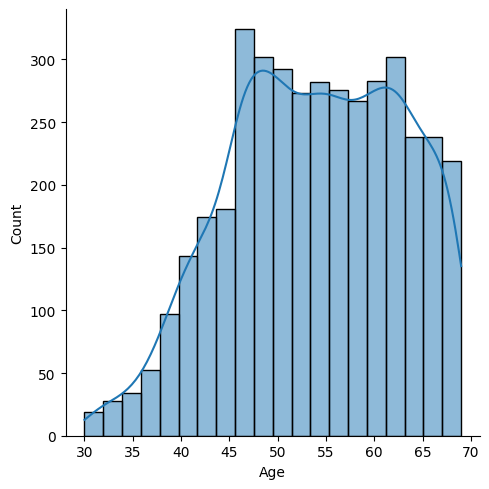

In [ ]:
sns.displot(x="Age", data=data, bins=20, kde=True);
#create distribution graph for age

In [ ]:
data["Survival Months"].mean()
#find mean of survival after diagnosed with cancer

71.29796222664015

In [ ]:
data.groupby('Status')['Age'].mean()
#find mean of the age between people who's alive and dead

Status
Alive    53.759096
Dead     55.150974
Name: Age, dtype: float64

In [ ]:
data['Age'].mean()
#overall mean age

53.97216699801193

In [ ]:
#ARE PEOPLE WITH BREAST CANCER AT AN AVERAGE AGE OF 54 OR  OR GREATER THAN 54 YEARS OLD?
from scipy import stats
age=data['Age']

t_stat, p_value = stats.ttest_1samp(age, popmean=54,alternative='greater')
print("t test:{:4f}".format(t_stat))
print("p_value:{:4f}".format(p_value))


if p_value>0.05:
    print("H0 hypothesis cannot be rejected")
else:
    print("H0 hypothesis is rejected")

t test:-0.196983
p_value:0.578075
H0 hypothesis cannot be rejected


In [ ]:
report = ProfileReport(data, title="Cancer data pandas profile report")
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

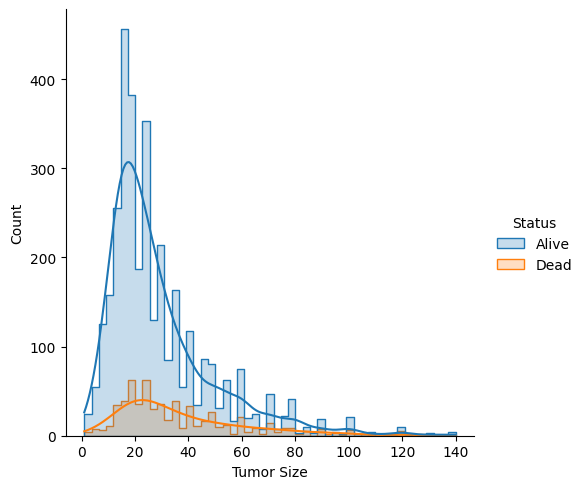

In [ ]:
sns.displot(data, x="Tumor Size", hue="Status", element="step", kde=True)
#create distribution plot to see the status and tumor size for alive and dead

In [ ]:
data.groupby("Status")["Tumor Size"].mean()
#mean tumor size for those alive is around 29 and around 37 for dead ones

Status
Alive    29.268779
Dead     37.139610
Name: Tumor Size, dtype: float64

In [ ]:
data["Tumor Size"].describe()
#mean of tumor size is 30 and there's a range of 21

count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64

# Create ML Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
def encodeColumn(parameter):
    data[parameter] = encoder.fit_transform(data[parameter])

# Run Function
listColumn = ['Race','Marital Status','T Stage ','N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status']
for i in listColumn:
    encodeColumn(i)
data.info()
#encode columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   Race                    4024 non-null   int64
 2   Marital Status          4024 non-null   int64
 3   T Stage                 4024 non-null   int64
 4   N Stage                 4024 non-null   int64
 5   6th Stage               4024 non-null   int64
 6   differentiate           4024 non-null   int64
 7   Grade                   4024 non-null   int64
 8   A Stage                 4024 non-null   int64
 9   Tumor Size              4024 non-null   int64
 10  Estrogen Status         4024 non-null   int64
 11  Progesterone Status     4024 non-null   int64
 12  Regional Node Examined  4024 non-null   int64
 13  Reginol Node Positive   4024 non-null   int64
 14  Survival Months         4024 non-null   int64
 15  Status               

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
#Perform multiple ML model such as logistics regression, decision tree, K-neighbor, SVC, GaussianNB
X=data.drop("Status",axis=1)
y=data["Status"]
#inputs are everything else in data and prediction is the status
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#paritioning 80:20

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
#standardize data then fit train and transform validation

def modeller(model):
    model.fit(X_train,y_train)
    tahmin=model.predict(X_test)
    skor=accuracy_score(y_test,tahmin)
    return round(skor*100,2)

models=[]

models.append(("LogisticRegression",LogisticRegression(random_state=0)))
models.append(("DecisionTreeClassifier",DecisionTreeClassifier(random_state=0)))
models.append(("KNeighborsClassifier",KNeighborsClassifier()))
models.append(("SVC",SVC(random_state=0)))
models.append(("GaussianNB",GaussianNB()))


model_ad=[]
model_basarı=[]

for i in models:
    model_ad.append(i[0])
    model_basarı.append(modeller(i[1]))


a=list(zip(model_ad,model_basarı))
sonuc=pd.DataFrame(a,columns=["Model ad","Model skor"])
print(sonuc)

#logstics regression works best because the prediction is whether alive 1 or dead 0

                 Model ad  Model skor
0      LogisticRegression       90.43
1  DecisionTreeClassifier       86.34
2    KNeighborsClassifier       88.45
3                     SVC       89.94
4              GaussianNB       83.98
